# Problem 3: XGBoost Regressor

## Import libraries

In [ ]:
import numpy as np
import pandas as pd

## Download dataset

In [ ]:
!gdown 1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp

Downloading...
From: https://drive.google.com/uc?id=1xwJmYJxEia06sxUdJyGO7JFx4DNK1fbp
To: /content/Problem3.csv
100% 37.4k/37.4k [00:00<00:00, 52.6MB/s]


In [ ]:
data_df = pd.read_csv('/content/Problem3.csv')
data_df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,4.468204,26.2,94.3,1.808289,8.2,51,6.7,False,0.0
1,7,4,oct,tue,4.517431,35.4,669.1,2.041220,18.0,33,0.9,False,0.0
2,7,4,oct,sat,4.517431,43.7,686.9,2.041220,14.6,33,1.3,False,0.0
3,8,6,mar,fri,4.529368,33.3,77.5,2.302585,8.3,97,4.0,True,0.0
4,8,6,mar,sun,4.503137,51.3,102.2,2.360854,11.4,99,1.8,False,0.0


## Numberize data

In [ ]:
categorical_cols = data_df.select_dtypes(include=['object', 'bool']).columns.to_list()

for col_name in categorical_cols:
  n_categories = data_df[col_name].nunique()
  print(f'Number of categories in {col_name}: {n_categories}')

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(data_df[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical_cols, columns=categorical_cols)

numerical_df = data_df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

Number of categories in month: 12
Number of categories in day: 7
Number of categories in rain: 2


## Preprocessing data

In [ ]:
X = encoded_df.drop(columns=['area'])
Y = encoded_df['area']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

## Train the model

In [ ]:
import xgboost as xgb

regressor = xgb.XGBRegressor(seed=7, learning_rate=0.01, n_estimators=102, max_depth=3)

regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=102, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluate model

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_pred, Y_test)
mae = mean_absolute_error(Y_pred, Y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.8845074196256495
Mean Absolute Error: 1.1484401341167767


# Problem 4: XGBoost Classifier

## Import libraries

In [1]:
import numpy as np
import pandas as pd

## Download dataset

In [2]:
!gdown 1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i

Downloading...
From: https://drive.google.com/uc?id=1pVdH-2b_odeuEPdXbLQYDcHXxgqqBK4i
To: /content/Problem4.csv
100% 12.3k/12.3k [00:00<00:00, 33.1MB/s]


In [3]:
data_df = pd.read_csv('/content/Problem4.csv')

data_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Train the model

In [4]:
X, Y = data_df.iloc[:, :-1], data_df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [11]:
import xgboost as xgb

classifier = xgb.XGBClassifier(seed=7)

classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Evaluate the model

In [12]:
Y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(Y_train, classifier.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)

print(f'Train Accuracy: {train_acc}')
print(f'Tets Accuracy: {test_acc}')

Train Accuracy: 1.0
Tets Accuracy: 0.9629629629629629


# Problem 3: XGBoost in Time-series Classification

## Import libraries

In [14]:
import numpy as np
import pandas as pd

## Download dataset

In [15]:
!gdown 1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II

Downloading...
From: https://drive.google.com/uc?id=1ZJkoYmYBjUEcTPnW00gMfiJ9cTltb-II
To: /content/FordA_TEST.tsv
100% 7.36M/7.36M [00:00<00:00, 56.4MB/s]


In [16]:
!gdown 1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI

Downloading...
From: https://drive.google.com/uc?id=1PPZ0IPpVIWymL1tf0YEud2fuJGK-0FVI
To: /content/FordA_TRAIN.tsv
100% 20.1M/20.1M [00:00<00:00, 71.5MB/s]


In [19]:
def read_tsv(file_name):
  data = np.loadtxt(file_name, delimiter='\t')
  y = data[:, 0]
  x = data[:, 1:]

  return x, y.astype(int)

X_train, Y_train = read_tsv('/content/FordA_TRAIN.tsv')
X_test, Y_test = read_tsv('/content/FordA_TEST.tsv')

In [23]:
X_train.shape

(3601, 500)

In [24]:
Y_train.shape

(3601,)

## Visualize the data

In [26]:
classes = np.unique(np.concatenate((Y_train, Y_test), axis=0))

classes

array([-1,  1])

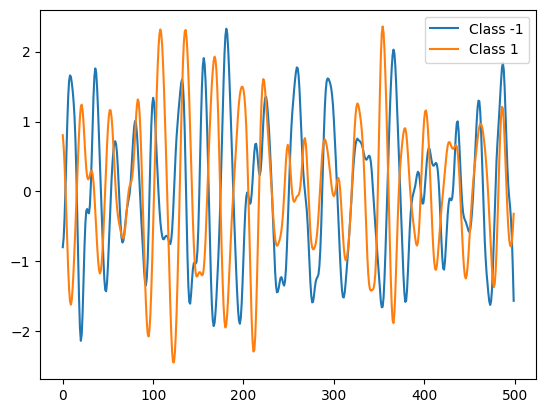

In [29]:
import matplotlib.pyplot as plt

plt.figure()
for cls in classes:
  X_train_cls = X_train[Y_train==cls]
  plt.plot(X_train_cls[0], label=f'Class {cls}')

plt.legend(loc='best')
plt.show()
plt.close()

In [30]:
Y_train[Y_train==-1] = 0
Y_test[Y_test==-1] = 0

## Train the model

In [32]:
import xgboost as xgb

time_series_classifier = xgb.XGBClassifier(n_estimators=200, random_state=42)
time_series_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Evaluate the model

In [33]:
Y_pred = time_series_classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       689
           1       0.78      0.79      0.79       631

    accuracy                           0.80      1320
   macro avg       0.80      0.80      0.80      1320
weighted avg       0.80      0.80      0.80      1320



In [37]:
print(confusion_matrix(Y_pred, Y_test))

[[550 139]
 [131 500]]


In [38]:
print(accuracy_score(Y_pred, Y_test))

0.7954545454545454
